In [3]:
from math import log
from collections import defaultdict
from itertools import islice
import tkinter as tk
from tkinter import ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as patches
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm, shapiro
from Bio import Entrez, SeqIO, AlignIO
from Bio.Seq import Seq
from Bio.Align import MultipleSeqAlignment
from Bio.SeqRecord import SeqRecord
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceMatrix
from matplotlib.patches import Rectangle

# Smoothed PhyloP signal

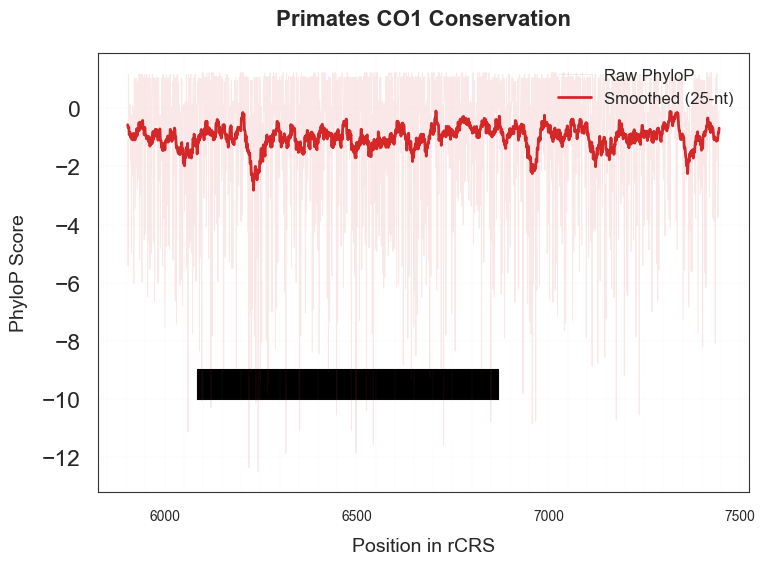

In [52]:
#import PhyloP file derived from UCSC
with open('../data/primates_phylop.txt', 'r') as file:
    values = file.read().splitlines()
    
values = [float(value) for value in values]

handle = Entrez.efetch(db='nucleotide',id='NC_012920.1', rettype='fasta')
record = SeqIO.read(handle, 'fasta')
Entrez.email = '...' #useremail
seq = record.seq[:-2]

compteur_pos = 0
dicto = {}
for i in range(len(seq)):  
    dicto[compteur_pos] = [seq[compteur_pos], values[compteur_pos]]
    compteur_pos += 1

# Print the length of the dictionary to confirm it worked correctly
start = 6855
pos = []
for i in range (40):
    pos.append(start + i)

# for i in pos:
#     print(i,dicto[i]) #this serves to confirm the nucleotide sequences match the PhyloP values from UCSC - that it is aligned

data = dicto

filtered_data = {k: v for k, v in data.items() if 5904 <= k <= 7445}

x1 = list(filtered_data.keys())
y1 = [value[1] for value in filtered_data.values()]
labels1 = [value[0] for value in filtered_data.values()]

# smooth over a 25 nt window
window_size = 25
y1_smooth = np.convolve(y1, np.ones(window_size) / window_size, mode='same')

sns.set(style="whitegrid", context="talk", palette="deep")

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x1, y1, color='#d62728', linestyle='-', linewidth=0.7, alpha=0.1, label='Raw PhyloP')
ax.plot(x1, y1_smooth, color='#d62728', linewidth=2, label='Smoothed (25-nt)')
ax.legend(
    frameon=False,
    fontsize=12,
    loc='lower right',
    bbox_to_anchor=(1, 0), 
    borderaxespad=0.5
)

ax.set_xlabel('Position in rCRS', fontsize=14, labelpad=10)
ax.set_ylabel('PhyloP Score', fontsize=14, labelpad=10)
ax.set_title('Primates CO1 Conservation', fontsize=16, weight='bold', pad=20)
tick_positions = np.arange(5900, 7450, 50)
tick_labels = [str(int(tick)) if tick % 500 == 0 else '' for tick in tick_positions]
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels, fontsize=10)
ax.xaxis.set_major_locator(ticker.MultipleLocator(50))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: str(int(x)) if x % 500 == 0 else ''))
ax.grid(True, linestyle='--', linewidth=0.1, alpha=0.5)
for spine in ['top', 'right', 'bottom', 'left']:
    ax.spines[spine].set_visible(True)
    ax.spines[spine].set_linewidth(0.8)
    ax.spines[spine].set_color('#333333') 

#Box for mtaltco1
start = 6088
end = 6868
height = 1
y = -10

ax.add_patch(
    Rectangle(
        (start, y),
        end - start,
        height,
        color='black',
        alpha=1,
        zorder=0
    )
)

ax.legend(frameon=False, fontsize=12, loc='upper right')
plt.tight_layout()
plt.show()


# Decomposed PhyloP signal

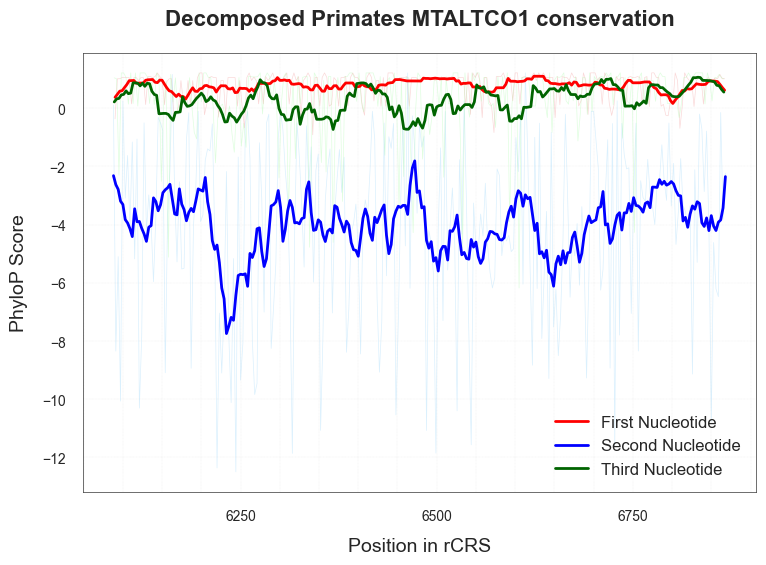

In [54]:
#for supplementals

filtered_data1 = {k: v for i, (k, v) in enumerate(data.items()) if 6088 <= k <= 6868 and (i % 3) == 0}
filtered_data2 = {k: v for i, (k, v) in enumerate(data.items()) if 6088 <= k <= 6868 and (i % 3) == 1}
filtered_data3 = {k: v for i, (k, v) in enumerate(data.items()) if 6088 <= k <= 6868 and (i % 3) == 2}

x1 = list(filtered_data1.keys())
y1 = [value[1] for value in filtered_data1.values()]
labels1 = [value[0] for value in filtered_data1.values()]

x2 = list(filtered_data2.keys())
y2 = [value[1] for value in filtered_data2.values()]
labels2 = [value[0] for value in filtered_data2.values()]

x3 = list(filtered_data3.keys())
y3 = [value[1] for value in filtered_data3.values()]
labels3 = [value[0] for value in filtered_data3.values()]

# moving average filter
window_size = 10
y1_smooth = np.convolve(y1, np.ones(window_size) / window_size, mode='same')
y2_smooth = np.convolve(y2, np.ones(window_size) / window_size, mode='same')
y3_smooth = np.convolve(y3, np.ones(window_size) / window_size, mode='same')

#Plot
sns.set(style="whitegrid", context="talk", palette="deep")

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(x1, y1, color='lightcoral', linestyle='-', linewidth=0.5, alpha=0.3)
ax.plot(x2, y2, color='lightskyblue', linestyle='-', linewidth=0.5, alpha=0.3)
ax.plot(x3, y3, color='palegreen', linestyle='-', linewidth=0.5, alpha=0.3)

ax.plot(x1, y1_smooth, color='red', linewidth=2, label='First Nucleotide')
ax.plot(x2, y2_smooth, color='blue', linewidth=2, label='Second Nucleotide')
ax.plot(x3, y3_smooth, color='darkgreen', linewidth=2, label='Third Nucleotide')

ax.set_xlabel('Position in rCRS', fontsize=14, labelpad=10)
ax.set_ylabel('PhyloP Score', fontsize=14, labelpad=10)
ax.set_title('Decomposed Primates MTALTCO1 conservation', fontsize=16, weight='bold', pad=20)

tick_positions = np.arange(6088, 6869, 50)
tick_labels = [str(int(tick)) if tick % 250 == 0 else '' for tick in tick_positions]
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels, fontsize=10)
ax.xaxis.set_major_locator(ticker.MultipleLocator(50))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: str(int(x)) if x % 250 == 0 else ''))
ax.tick_params(axis='y', labelsize=10)

# Grid and spine formatting
ax.grid(True, linestyle='--', linewidth=0.2, alpha=0.5)
for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_visible(True)
    ax.spines[spine].set_linewidth(0.5)
    ax.spines[spine].set_color('#333333')  # Dark grey

# Legend in bottom right
ax.legend(
    frameon=False,
    fontsize=12,
    loc='lower right',
    bbox_to_anchor=(1, 0),
    borderaxespad=0.5
)

plt.tight_layout()
plt.show()


# Compare PhyloP scores per nucleotide position

/var/folders/vk/n56n38h15x7fnx74jb_f87rm0000gn/T/ipykernel_23741/2457517046.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


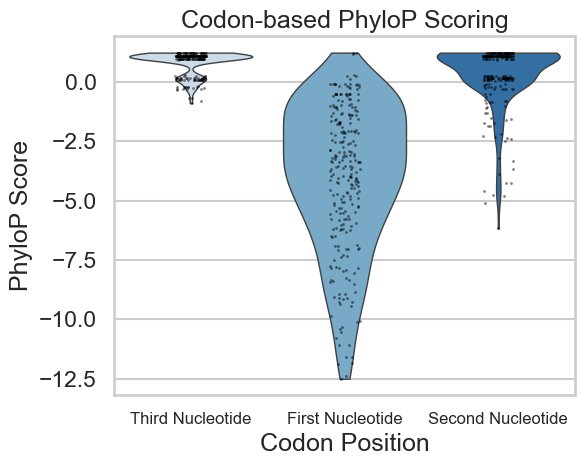

In [57]:
def violin(filtered_data1, filtered_data2, filtered_data3):
    # Extract scores
    scores1 = [val[1] for val in filtered_data1.values()]
    scores2 = [val[1] for val in filtered_data2.values()]
    scores3 = [val[1] for val in filtered_data3.values()]

    df = pd.DataFrame({
        'Codon Position': (
            ['Third Nucleotide'] * len(scores1) +
            ['First Nucleotide'] * len(scores2) +
            ['Second Nucleotide'] * len(scores3)
        ),
        'PhyloP Score': scores1 + scores2 + scores3
    })

    plt.figure(figsize=(6, 5))
    sns.violinplot(
        x='Codon Position',
        y='PhyloP Score',
        data=df,
        inner=None,
        cut=0,
        linewidth=1,
        palette='Blues'
    )
    sns.stripplot(
        x='Codon Position',
        y='PhyloP Score',
        data=df,
        color='black',
        size=2,
        jitter=True,
        alpha=0.5
    )
    plt.title("Codon-based PhyloP Scoring")
    
    # Reduce x-axis label font size
    plt.xticks(fontsize=12)
    
    plt.tight_layout()
    plt.show()

violin(filtered_data1, filtered_data2, filtered_data3)

# Sliding Window Decomposed PhyloP

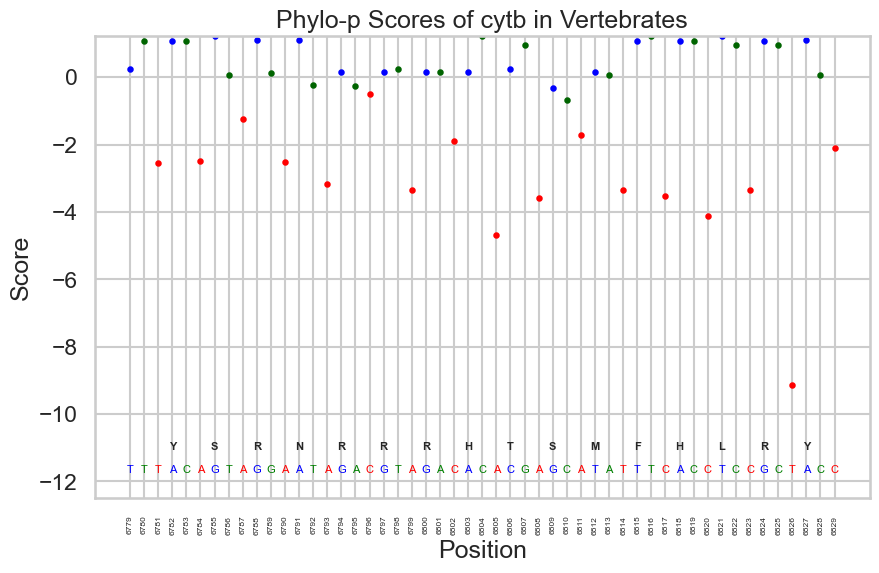

In [32]:
class SlidingWindowGUI:
    def __init__(self, root):
        self.root = root
        self.root.title("Sliding Window GUI")

        self.start_pos = 6088
        self.end_pos = 6868

        self.aa_start_pos = self.start_pos  
        self.aa_sequence = self.translate_sequence()  

        filtered = {k: v for k, v in data.items() if self.start_pos <= k <= self.end_pos}
        items = sorted(filtered.items())  # sorted by position

        self.filtered_data1 = {k: v for k, v in items if (k - self.aa_start_pos) % 3 == 0}
        self.filtered_data2 = {k: v for k, v in items if (k - self.aa_start_pos) % 3 == 1}
        self.filtered_data3 = {k: v for k, v in items if (k - self.aa_start_pos) % 3 == 2}

        all_scores = [v[1] for k, v in data.items() if self.start_pos <= k <= self.end_pos]
        self.y_min = min(all_scores)
        self.y_max = max(all_scores)

        self.fig, self.ax = plt.subplots(figsize=(10, 6))
        self.canvas = FigureCanvasTkAgg(self.fig, master=self.root)
        self.canvas_widget = self.canvas.get_tk_widget()
        self.canvas_widget.pack(fill=tk.BOTH, expand=True)

        self.sequence_label = tk.Label(self.root, text="", font=("Courier", 10), anchor="w", justify="left")
        self.sequence_label.pack(fill=tk.X, padx=10)

        self.window_size = 50

        self.scrollbar = ttk.Scale(
            self.root,
            from_=self.start_pos,
            to=self.end_pos - self.window_size,
            orient='horizontal',
            command=self.update_plot
        )
        self.scrollbar.pack(fill=tk.X, padx=10, pady=5)
        self.current_position = self.start_pos
        self.update_plot(self.start_pos)

    def translate_sequence(self):
        nts = [data[pos][0] for pos in range(self.start_pos, self.end_pos + 1) if pos in data]
        aas = []
        for i in range(0, len(nts) - 2, 3):
            codon = ''.join(nts[i:i+3])
            aas.append(self.codon_to_aa(codon))
        return aas

    def codon_to_aa(self, codon):
        
        codon_table = {
            'ATA':'M', 'ATC':'I', 'ATT':'B', 'ATG':'M', #ATT / B should be read as M if first to initiate translation then as I
            'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T',
            'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
            'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',
            'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
            'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
            'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q',
            'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
            'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
            'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
            'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
            'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
            'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
            'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
            'TAC':'Y', 'TAT':'Y', 'TAA':'*', 'TAG':'*',
            'TGC':'C', 'TGT':'C', 'TGA':'R', 'TGG':'W',
        }
        return codon_table.get(codon, 'X')  # X if unknown

    def get_sequence_in_window(self, start, end):
        sequence = ''.join([data[k][0] for k in range(start, end + 1) if k in data])
        return sequence

    def update_plot(self, position):
        self.current_position = int(float(position))
        start = self.current_position
        end = min(start + self.window_size, self.end_pos)
        self.ax.clear()

        def extract_data(data_dict):
            x_vals = [k for k in data_dict.keys() if start <= k <= end]
            y_vals = [data_dict[k][1] for k in x_vals]
            return x_vals, y_vals

        x1, y1 = extract_data(self.filtered_data1)
        x2, y2 = extract_data(self.filtered_data2)
        x3, y3 = extract_data(self.filtered_data3)

        self.plot_range(x1, y1, 'red', 'First Nucleotide')
        self.plot_range(x2, y2, 'blue', 'Second Nucleotide')
        self.plot_range(x3, y3, 'darkgreen', 'Third Nucleotide')

        self.ax.set_xlabel('Position')
        self.ax.set_ylabel('Score')
        self.ax.set_title('Phylo-p Scores of cytb in Vertebrates')

        xticks = list(range(start, end + 1))
        self.ax.set_xticks(xticks)
        self.ax.set_xticklabels(xticks, rotation=90, fontsize=6)

        y_min, y_max = self.y_min, self.y_max
        self.ax.set_ylim(y_min, y_max)

        y_text_nuc = y_min + 0.05 * (y_max - y_min)
        y_text_aa = y_text_nuc + 0.05 * (y_max - y_min)

        codon_colors = ['red', 'blue', 'green']
        for i, pos in enumerate(xticks):
            if pos in data:
                base = data[pos][0]
                color = codon_colors[(pos - self.aa_start_pos) % 3]
                self.ax.text(
                    pos,
                    y_text_nuc,
                    base,
                    color=color,
                    fontsize=8,
                    ha='center',
                    va='bottom',
                    clip_on=False
                )

        frame_offset = (start - self.aa_start_pos) % 3
        codon_positions = list(range(start + (3 - frame_offset) % 3, end - 2 + 1, 3))
        
        for i, codon_start in enumerate(codon_positions):
            codon = ''.join([data.get(pos, ('N',))[0] for pos in range(codon_start, codon_start + 3)])
            aa = self.codon_to_aa(codon)
            codon_center = codon_start + 1
            self.ax.text(
                codon_center,
                y_text_aa,
                aa,
                fontsize=8,
                ha='center',
                va='bottom',
                fontweight='bold',
                clip_on=False
            )
        for pos in xticks:
            self.ax.axvline(x=pos, color='gray', linewidth=0.3, alpha=0.2, zorder=0)

        sequence = self.get_sequence_in_window(start, end)
        self.sequence_label.config(text=f"Sequence [{start}:{end}]:\n{sequence}")
        self.canvas.draw()

    def plot_range(self, x, y, color, label):
        self.ax.scatter(x, y, color=color, s=10, label=label)


if __name__ == "__main__":
    root = tk.Tk()
    app = SlidingWindowGUI(root)

    root.mainloop()


# Hamming distance, CO1 and MTALTCO1

In [62]:
mitocode = {
    'ATA':'M', 'ATC':'I', 'ATT':'B', 'ATG':'M',
    'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T',
    'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
    'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',
    'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
    'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
    'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q',
    'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
    'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
    'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
    'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
    'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
    'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
    'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
    'TAC':'Y', 'TAT':'Y', 'TAA':'*', 'TAG':'*',
    'TGC':'C', 'TGT':'C', 'TGA':'R', 'TGG':'W',
}

def compute_distance_matrix(msa_file, model="identity"):
    """
    Computes a distance matrix from an MSA using Biopython's DistanceCalculator
    """
   
    calculator = DistanceCalculator(model)
    distance_matrix = calculator.get_distance(msa_file)
    
    return distance_matrix

def distance_heatmap(dataframe):
    plt.figure(figsize=(40, 28))
    sns.heatmap(
        dataframe,
        annot=False,
        cmap="viridis",
        square=True,
        vmin=0.0,             
        vmax=0.6,             
        cbar_kws={'label': 'Hamming Distance', 'shrink': 1}
    )
    plt.title("Pairwise Distance Heatmap", fontsize=40)

    # Increase font size of colorbar ticks
    cbar = plt.gca().collections[0].colorbar
    cbar.ax.tick_params(labelsize=30)

    plt.tight_layout()
    plt.show()

def distance_matrix_to_dataframe(distance_matrix):
    """
    Converts the triangular DistanceMatrix to a symmetric pandas DataFrame.
    """
    names = distance_matrix.names
    size = len(names)
    matrix = np.zeros((size, size))

    for i in range(size):
        for j in range(i + 1):
            matrix[i][j] = distance_matrix[i, j]
            matrix[j][i] = distance_matrix[i, j]

    return pd.DataFrame(matrix, index=names, columns=names)

def translate(sequence, genetic_code):
    """Translates a nucleotide sequence into an amino acid sequence based on the given genetic code."""
    amino_acid_seq = ""

    for i in range(0, len(sequence), 3):
        codon = sequence[i:i+3]
        #print(codon)
    
        if len(codon) == 3:  # Full length codon 
            amino_acid = genetic_code.get(codon)  # Translate single codon
            if amino_acid == 'B':
                if i == 0:
                    amino_acid = 'M'
                else: 
                    amino_acid = 'I'
            amino_acid_seq += amino_acid
    
    return amino_acid_seq


/Users/francisrobitaille/Desktop/venv/lib/python3.12/site-packages/Bio/SeqRecord.py:228: BiopythonDeprecationWarning: Using a string as the sequence is deprecated and will raise a TypeError in future. It has been converted to a Seq object.
  warnings.warn(


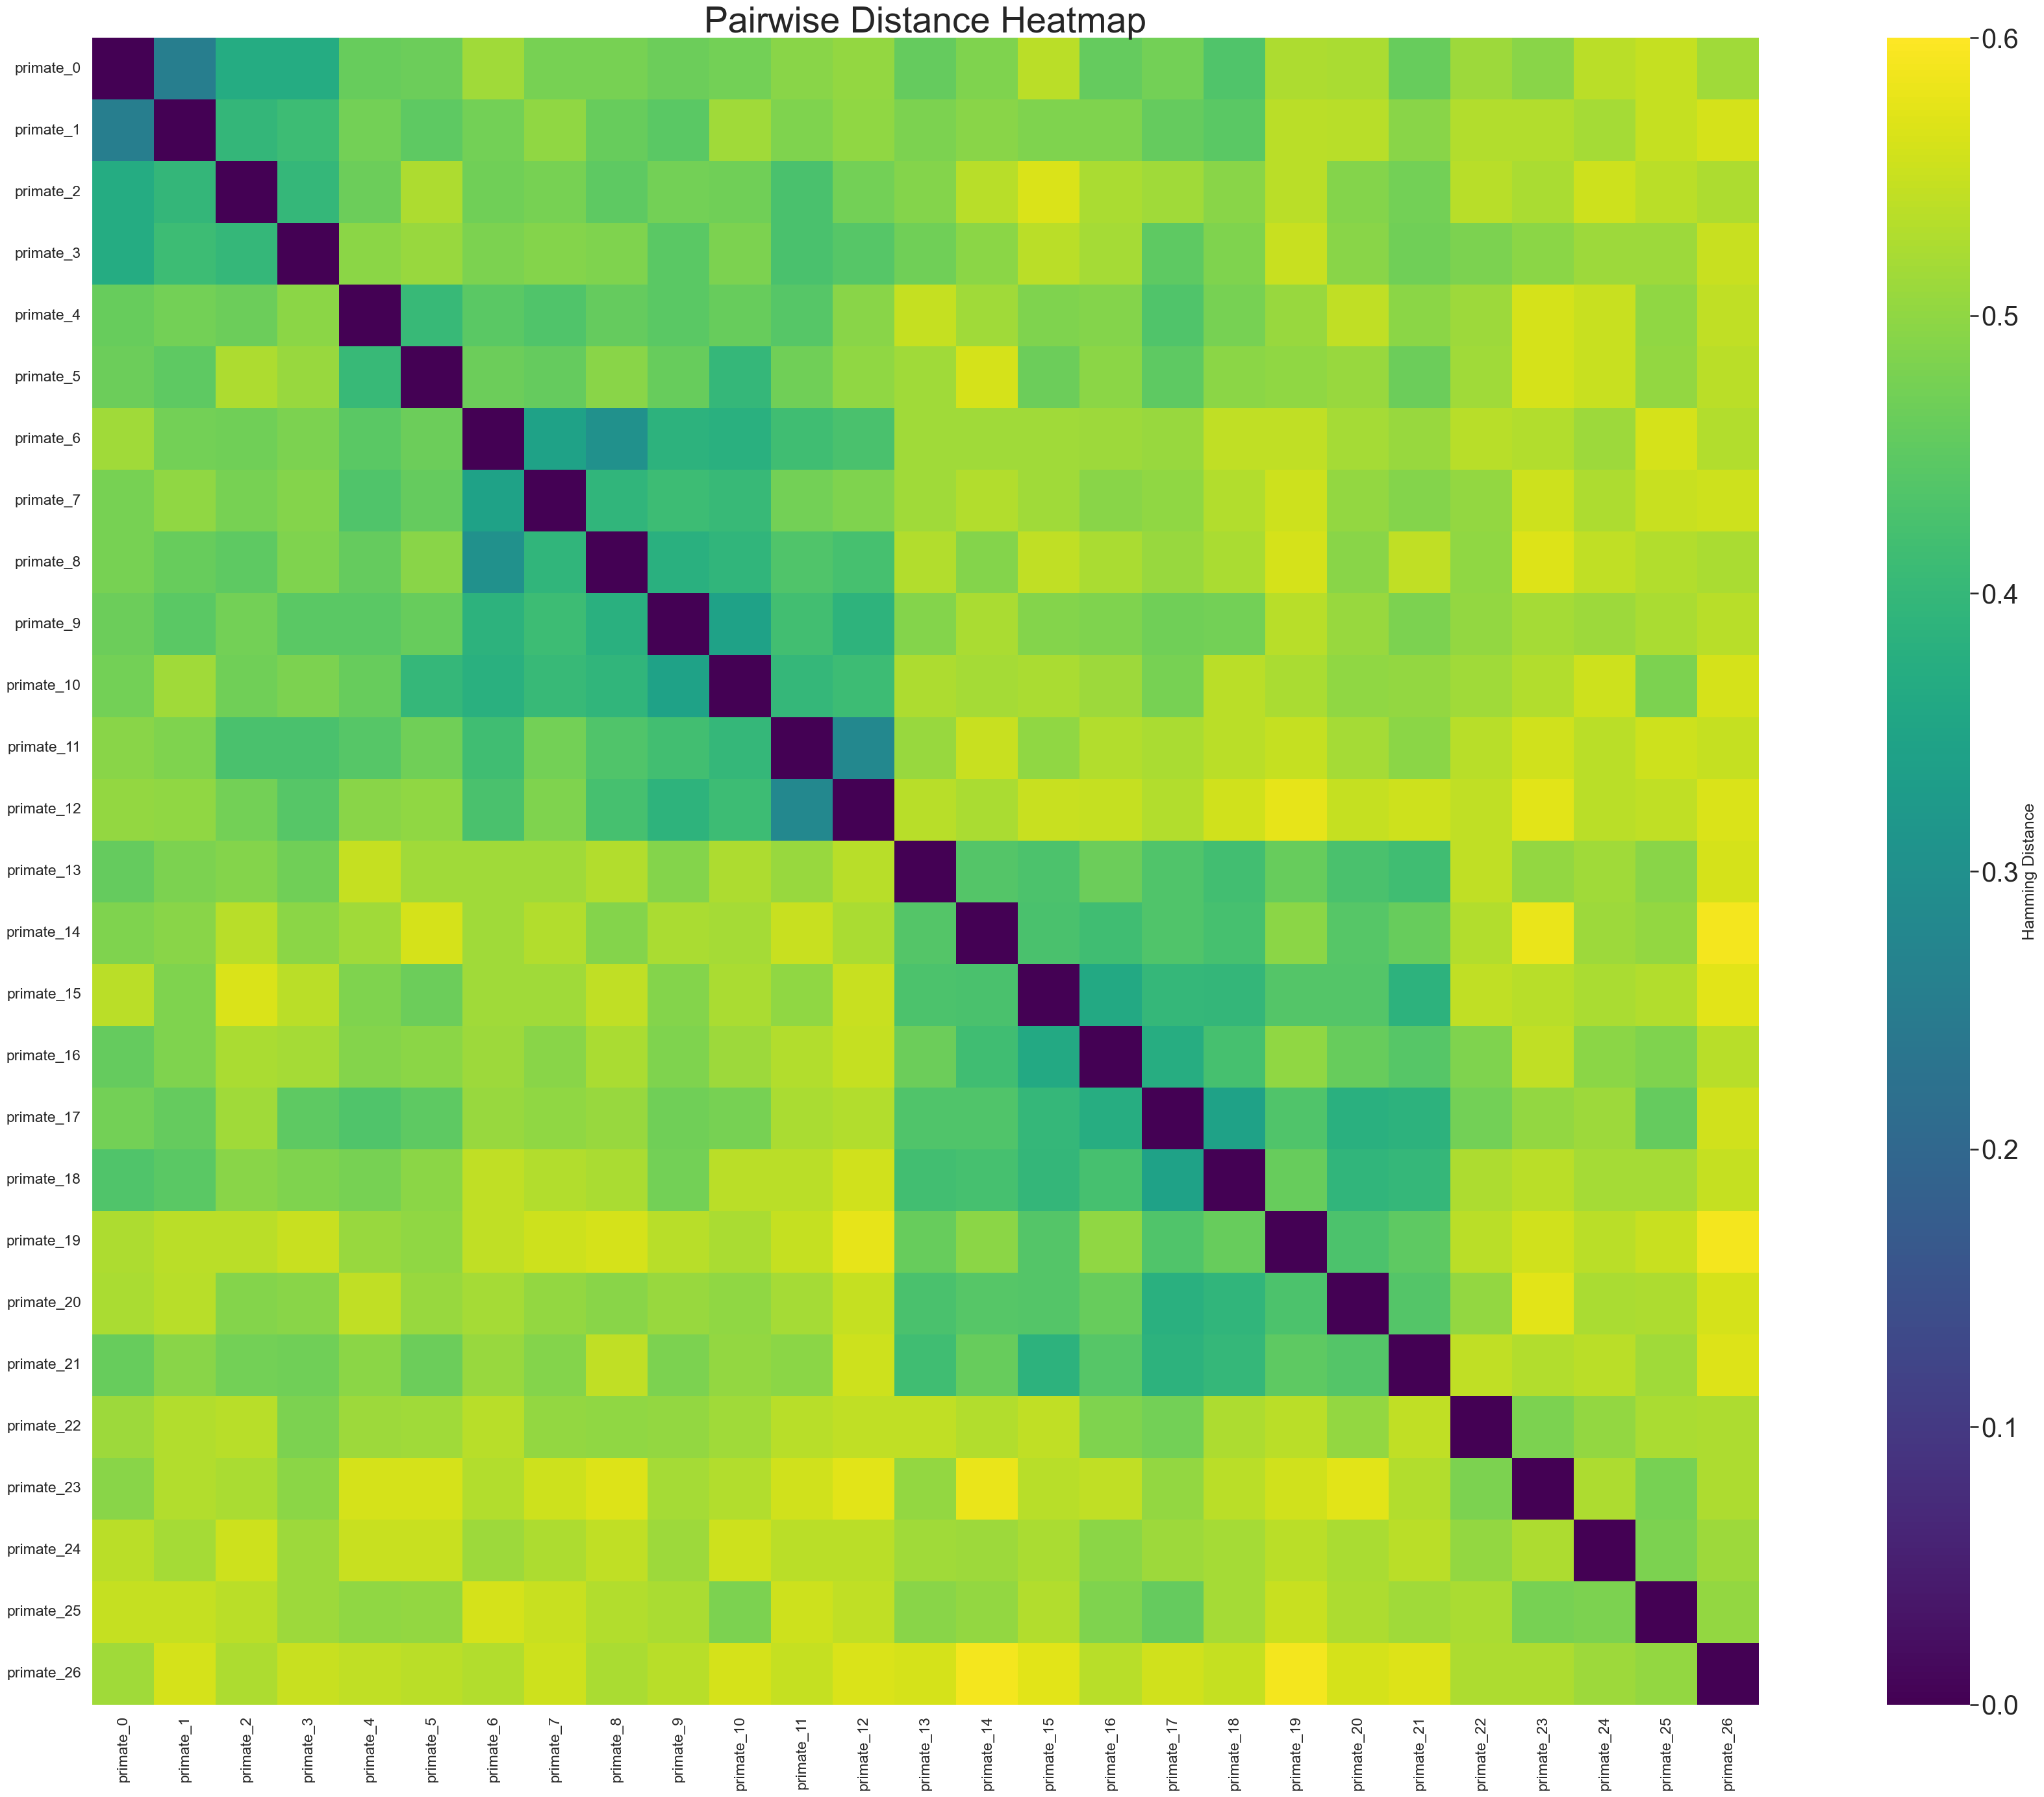

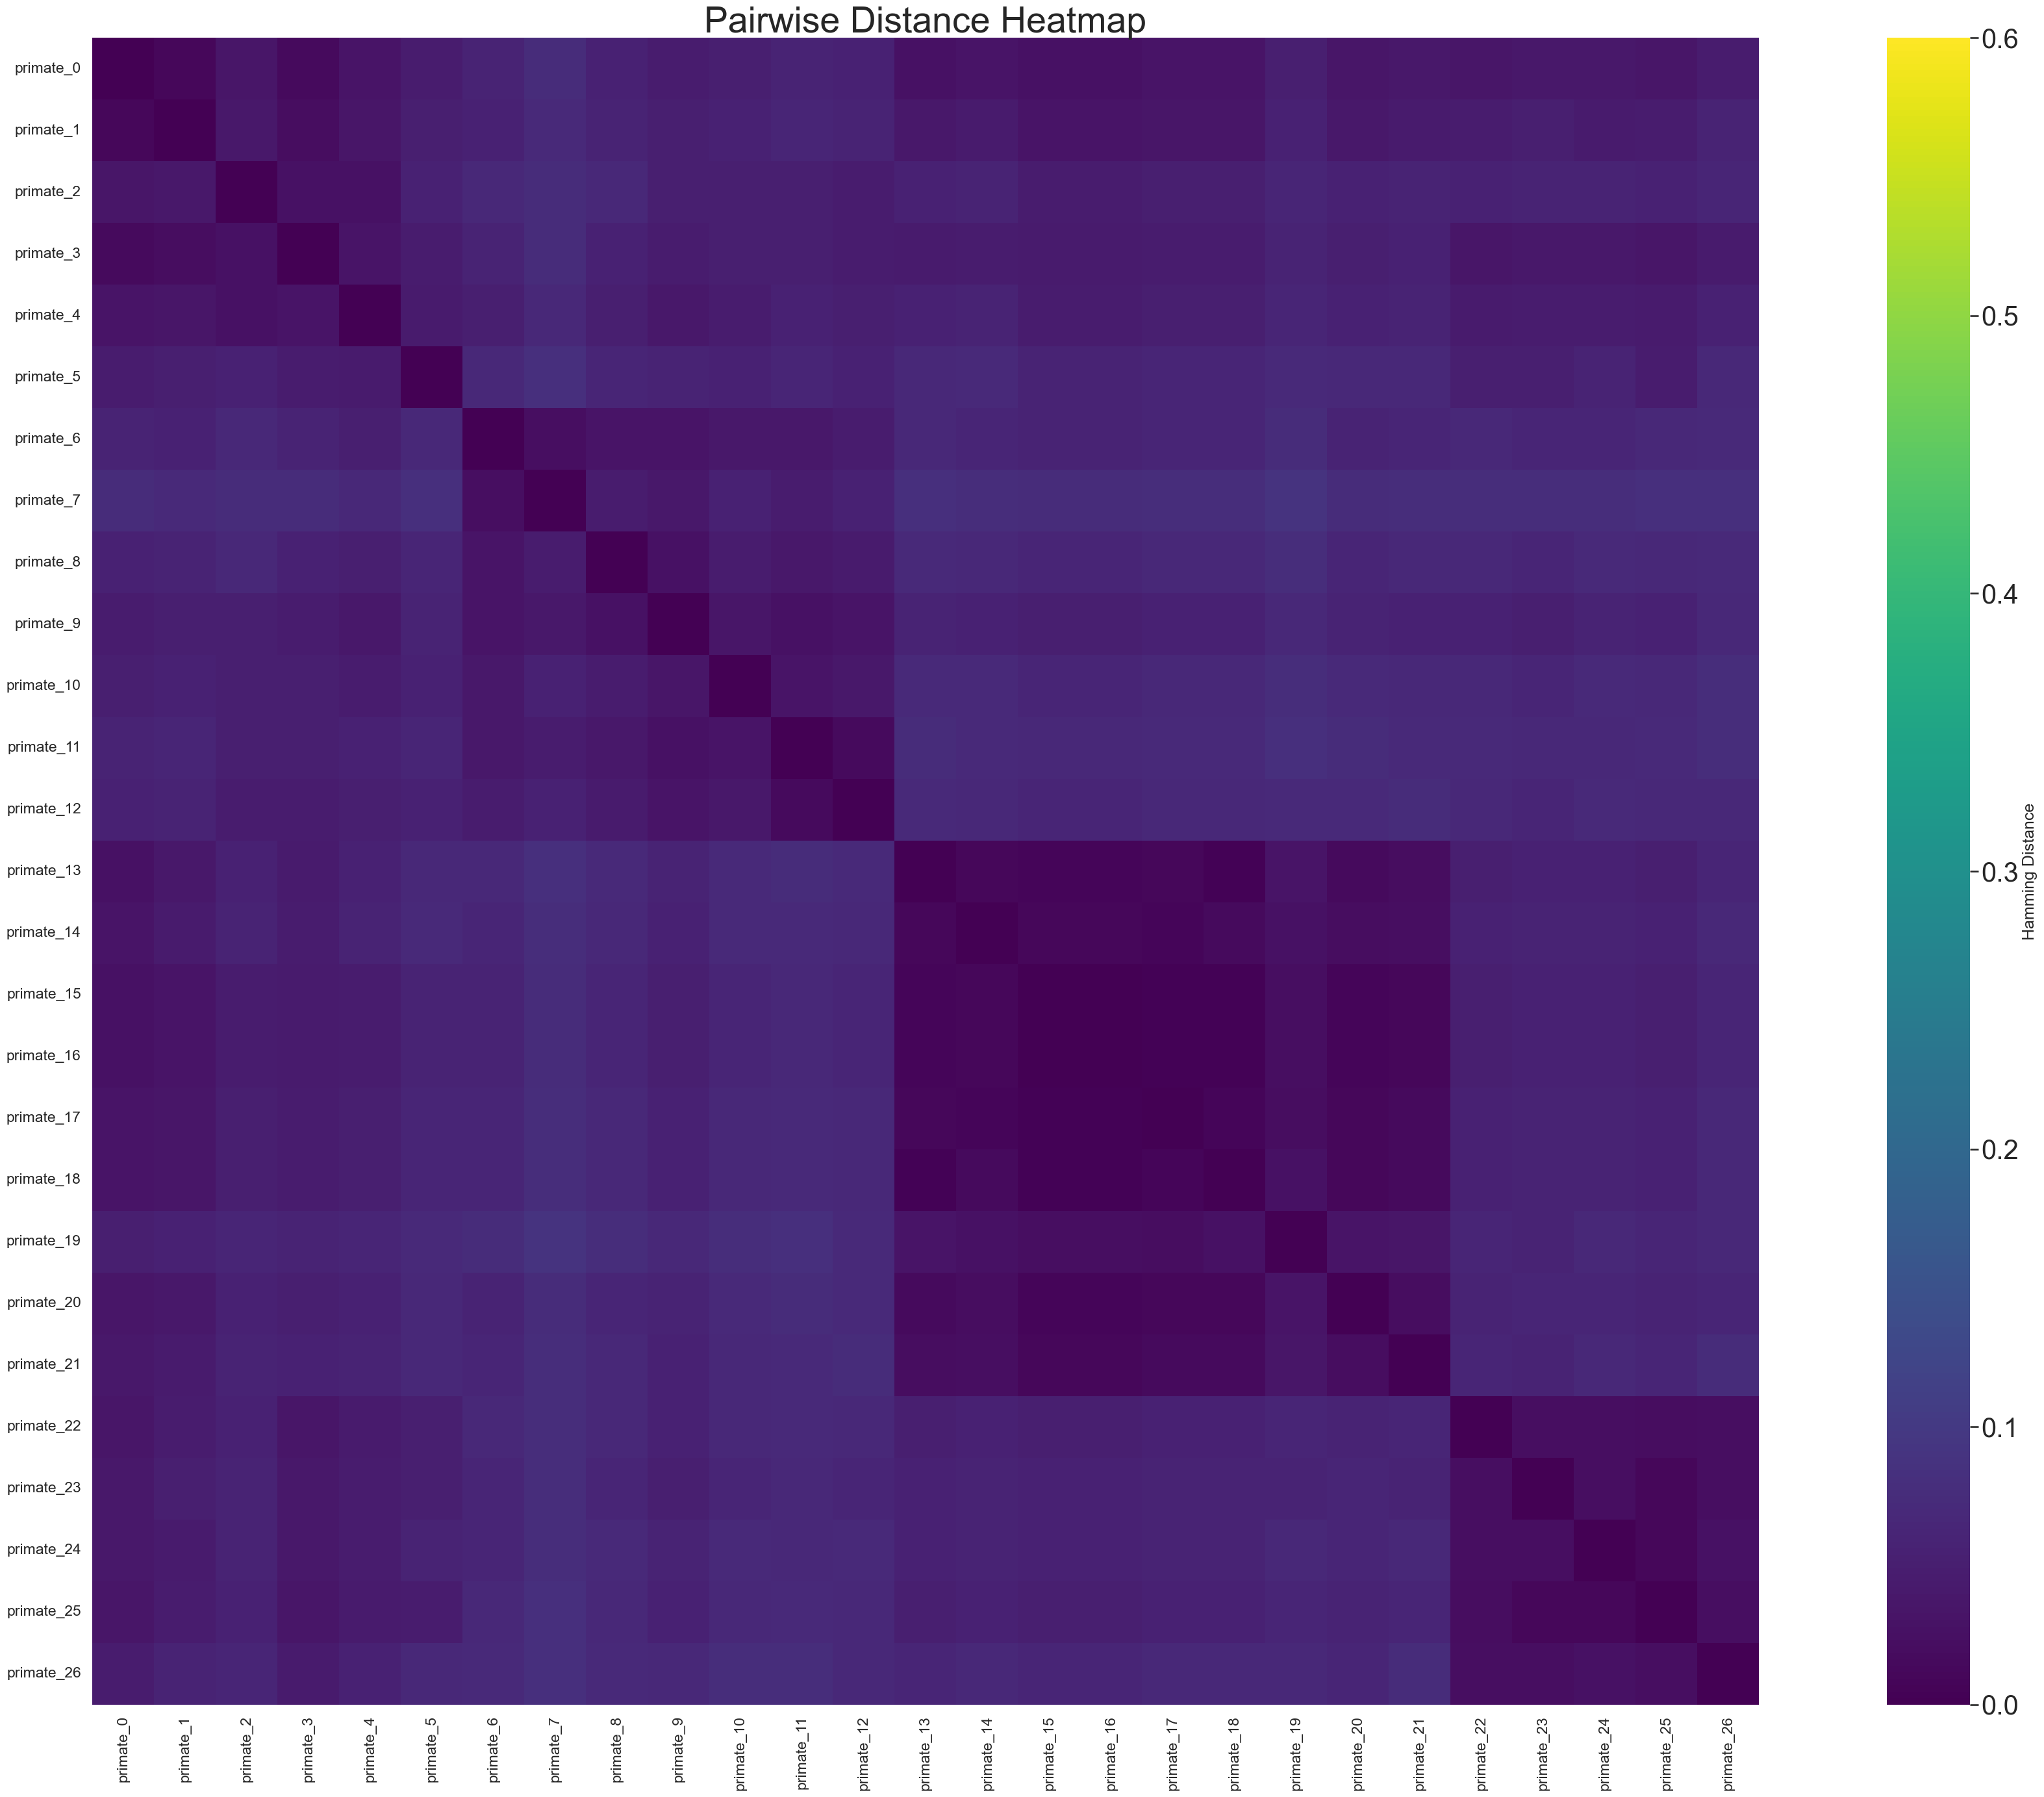

In [63]:
#import sequences
msa_file = '/Users/francisrobitaille/Documents/27_primates_mtaltCO1_nuc.fasta'

alignment = AlignIO.read(msa_file, 'fasta')

mtaltco1_sequences = MultipleSeqAlignment([
    SeqRecord(translate(record.seq, mitocode), id=f"primate_{i}") 
    for i, record in enumerate(alignment)
])

mtco1_sequences = MultipleSeqAlignment([
    SeqRecord(translate(record.seq[1:], mitocode), id=f"primate_{i}") 
    for i, record in enumerate(alignment)
])

distance_mtaltco1 = compute_distance_matrix(mtaltco1_sequences)
distance_mtco1 = compute_distance_matrix(mtco1_sequences)

df_mtaltco1 = distance_matrix_to_dataframe(distance_mtaltco1)
df_mtco1 = distance_matrix_to_dataframe(distance_mtco1)

# Plot heatmaps
distance_heatmap(df_mtaltco1)
distance_heatmap(df_mtco1)

# Calculate neighbor distances for MTALTCO1 and CO1

In [1]:
def generate_jump_stats(identity_df, medoid_pos, nb_true_seq, plot = True, normality = True):

    """
    this calculates the distances from one neighbour to the next, ex. between primate0 & primate 1, then primate1 & primate 2, etc.
    """

    liste = [] #distances from one sequence to the next
    
    for i in range(nb_true_seq-1):
        liste.append(identity_df.iloc[i+1, i])
    
    # Compute jump statistics
    mean = np.mean(liste)
    std = np.std(liste)

    z_score = 1.96 

    lower_bound = mean - std*z_score
    upper_bound = mean + std*z_score  
    
    print('min jump', lower_bound)
    print('max_jump', upper_bound)

    if normality == True:
        statistic, p_value = stats.shapiro(liste)
        print(f"SW p-value: {p_value:.3f}")
        if p_value > 0.05:
            print("Normally distributed")
        else:
            print("NOT normally distributed")
            
        stats.probplot(liste, dist="norm", plot=plt)
        plt.title("Q–Q Plot")
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.show()
        
    if plot == True:

        plt.figure(figsize=(10, 6))
        plt.hist(liste, bins=10, color='steelblue', edgecolor='black', density=True, alpha=0.7)
        
        # Plotting bell curve
        xmin, xmax = plt.xlim()  
        x = np.linspace(xmin, xmax, 100)  
        y = norm.pdf(x, mean, std) 
        
        # Plot the bell curve on top of the histogram
        plt.plot(x, y, 'r-', lw=2, label=f'Normal Fit: mean={mean:.3f}, std={std:.1f}')
        
        # vertical lines for p-value thresholds
        plt.axvline(lower_bound, color='green', linestyle='--', linewidth=2, label=f'P < 0.05 Lower Bound: {lower_bound:.2f}')
        plt.axvline(upper_bound, color='green', linestyle='--', linewidth=2, label=f'P < 0.05 Upper Bound: {upper_bound:.2f}')
        
        # vertical line for mean
        plt.axvline(mean, color='red', linestyle='-', linewidth=2, label=f'Mean = {mean:.3f}')

        plt.title("Successive Pairwise Hamming Distances (true0–true26)")
        plt.xlabel("Hamming Distance")
        plt.ylabel("Density")
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.legend()
        plt.tight_layout()
        plt.show()
    
    return lower_bound, upper_bound, true_distance_to_medoid, liste



In [2]:
# CO1
lower_bound, upper_bound, true_distance_to_medoid, jump_dist = generate_jump_stats(df_mtco1, 1,26)

NameError: name 'df_mtco1' is not defined

min jump 0.27488058289698425
max_jump 0.557427109410708
SW p-value: 0.801
Normally distributed


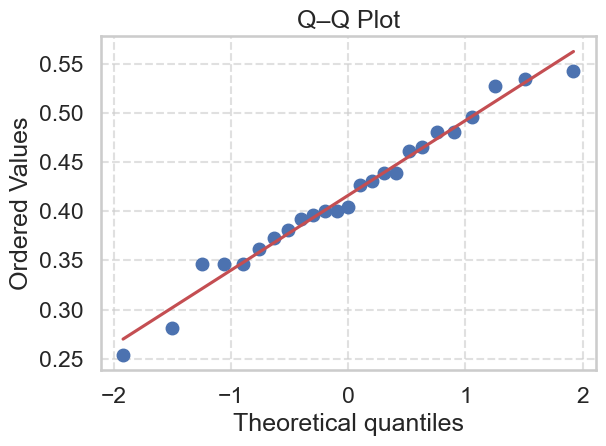

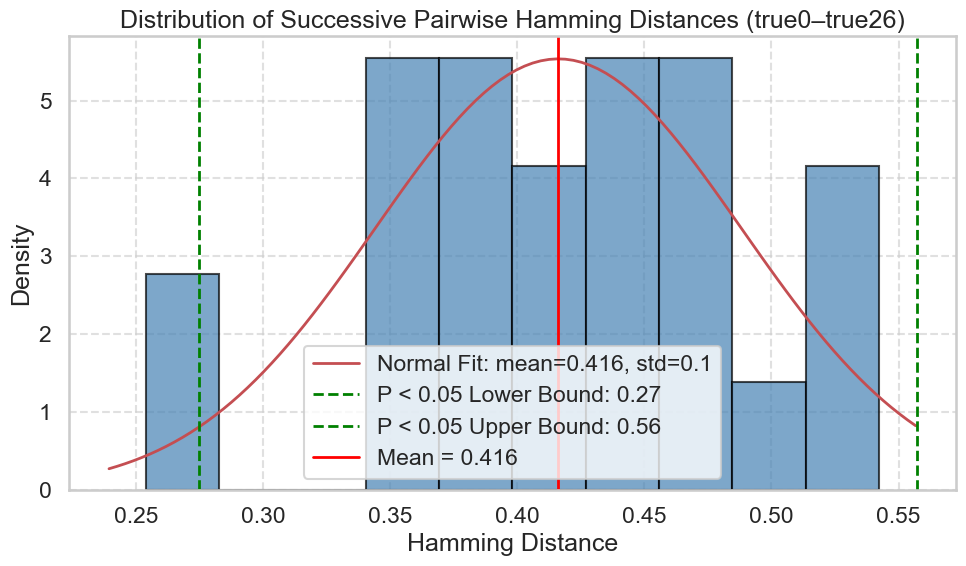

In [61]:
#MTALTCO1
lower_bound, upper_bound, true_distance_to_medoid, jump_dist = generate_jump_stats(df_mtaltco1, 1,26)

# Fission-Fusion charts, MTALTCO1, MTALTND4, CYTB187-AA

In [68]:
# for supplementals, note that since this is repurposed code, some things are not streamlined and/or 
# possibly redundant with other parts of the code

class Sequence:
    def __init__(self, name, dna_seq, start, end):
    # Start and end are defined for each strand. L coord is not equal H coord. See H to L functions
        self.name = name
        self.start = start
        self.end = end
        self.dna_seq = str(dna_seq)
        self.rna_seq = self.dna_seq.replace("T", "U")

class ORF:
    def __init__(self, sequence, mother, start, end, reading_frame, code_used):
        self.reading_frame = reading_frame

        #AA sequence
        self.sequence = sequence
        self.length = len(sequence)
        self.mother = mother
        self.list_sisters = []
        self.code_used = [code_used]

        #coordonates of the genbank sequence
        self.start = start
        self.end = end

        #double check to match
        self.dna = None

        #is ref
        self.is_ref = None
        
mit_alt = {"UUU": "F", "UUC": "F", "UUA": "L", "UUG": "L",
    "CUU": "L", "CUC": "L", "CUA": "L", "CUG": "L",
    "AUU": "B", "AUC": "I", "AUA": "B", "AUG": "M",
    "GUU": "V", "GUC": "V", "GUA": "V", "GUG": "V",
    "UCU": "S", "UCC": "S", "UCA": "S", "UCG": "S",
    "CCU": "P", "CCC": "P", "CCA": "P", "CCG": "P",
    "ACU": "T", "ACC": "T", "ACA": "T", "ACG": "T",
    "GCU": "A", "GCC": "A", "GCA": "A", "GCG": "A",
    "UAU": "Y", "UAC": "Y", "UAA": "*", "UAG": "*",
    "CAU": "H", "CAC": "H", "CAA": "Q", "CAG": "Q",
    "AAU": "N", "AAC": "N", "AAA": "K", "AAG": "K",
    "GAU": "D", "GAC": "D", "GAA": "E", "GAG": "E",
    "UGU": "C", "UGC": "C", "UGA": "W", "UGG": "W",
    "CGU": "R", "CGC": "R", "CGA": "R", "CGG": "R",
    "AGU": "S", "AGC": "S", "AGA": "R", "AGG": "R",
    "GGU": "G", "GGC": "G", "GGA": "G", "GGG": "G"}

def translate_all_3frames (mother, code):
    """
    Translates a given nucleotide sequence in all three sense reading frames, returns them in a list
    """
    #seq is RNA
    seq = mother.rna_seq
    translated_3_frames = []
    for frame in range (3):
        reading_frame = ''
        for i in range(frame, len(seq),3):
            codon = seq[i:i+3]
            if len(codon) == 3:
                if codon in code:
                    reading_frame += code[codon]
        translated_3_frames.append(reading_frame)
    return translated_3_frames

def create_proteins (orfs, mother, code_used):

    """
    Takes as input an amino acid sequence, splits it with the split function,
    then starts proteins at plausible initiation sites (ATT, ATG, ATA) in split sequences,
    then outputs the final list of all proteins that came from the initial amino acid sequence.
    """
    
    #minimum len in AA
    min_len = 0
    final_prots = []

    #for each reading frame (3)
    compteur_RF = 0
    for i in range(3):

        # j is each split sequence of AA
        RF_pos = 0

        #split separates MYK*KLKK into MYK and KLKK
        for j in split(orfs[i]):
            longest_prot = 0
            longest_protein = None

            # k is each amino acid in j
            k = 0
            while k < len(j):

                protein = ''

                if j[k] == 'M' or j[k] == 'B':

                    protein = j[k:len(j)]

                    #if it starts with ATT, replace it with 'M' and replace downstream ATT's with 'I':
                    if protein[0] == 'B':
                        protein = 'M' + protein[1:]

                    if len(protein) > min_len:
                        protein = protein.replace('B','I')

                        if longest_prot == 0:
                            longest_protein = ORF(protein, mother.name, compteur_RF + (RF_pos+ k )*3, compteur_RF + (RF_pos+ k +len(protein))*3, compteur_RF, code_used)
                            final_prots.append(longest_protein)

                        if longest_prot != 0:
                            longest_protein.list_sisters.append(protein)
                        longest_prot += 1

                k += 1
            RF_pos += len(j)
        compteur_RF += 1

    return final_prots

#split the AA sequence if '*' and reconstruct the stop codon if it was there in the first place
def split (orfs):
    split = orfs.split('*')
    split_wise = [seq + '*' for seq in split[:-1]]
    if orfs[-1] == '*':
        split_wise.append(split[-1] + '*')
    else:
        split_wise.append(split[-1])
    return split_wise

def plot_protein_regions(data, start_red, end_red):
    for species, proteins in data.items():
        # Find the maximum end point to set the length of the genome
        max_pos = max([end for start, end, _ in proteins])
        
        fig, ax = plt.subplots(figsize=(10, 0.5))  # Set size of plot (adjust if needed)
        ax.set_xlim(0, max_pos)
        ax.set_ylim(0, 1)  # Only need a single line of boxes
        ax.set_yticks([])  # Hide y-axis
        ax.set_title(species, fontsize=8)
        
        ax.add_patch(patches.Rectangle((0, 0), max_pos, 1, color='white'))
        
        for start, end, sequence in proteins:
            length = end - start
            ax.add_patch(patches.Rectangle((start, 0), length, 1, color='black'))
        
        # vertical red lines at positions 185 and 962
        ax.axvline(x= start_red, color='red', linewidth=5)  # Red line at 185
        ax.axvline(x= end_red, color='red', linewidth=5)  # Red line at 962
        ax.tick_params(axis='x', labelsize=15)
        
        # Display the plot
        plt.show()



In [38]:
primates_mtco1 = {
    'NC_012920.1': [5904, 7445],
    'KF683087.1': [5903,7444],
    'MK033602.1': [5901,7442],
    'MG025536.1': [5899,7440],
    'MG025537.1': [5899,7440],
    'NC_001645.1': [5325,6875],
    'NC_037853.1': [5326,6862],
    'NC_002083': [5342,6884],
    'NC_001643': [5321, 6862],
    'NC_012670': [5858, 7396],
    'NC_001644': [5322, 6863],
    'NC_001646': [5332, 6871],
    'NC_037466': [5854, 7422],
    'NC_010300': [5349, 6890],
    'NC_002763': [5329, 6874],
    'NC_012775': [5314, 6855],
    'NC_021947': [5323, 6891],
    'NC_001992': [5336, 6877],
    'NC_019802': [5342, 6883],
    'NC_021956': [5329, 6897],
    'NC_007009': [5326, 6865],
    'NC_012775': [5314, 6855],
    'NC_028210': [5351, 6895],
    'NC_050682': [5319, 6858],
    'NC_018116': [5324, 6880],
    'NC_023961': [5326, 6894],
    'NC_012762': [5362, 6903],
    'NC_021960': [5319, 6875],
    'NC_027825': [5328, 6884],
    'NC_006901': [5336, 6880],
    'NC_064162': [5320, 6876],
    'NC_010299': [5356, 6903],
    'NC_002082': [5322, 6863],
    'NC_021951': [5321, 6874],
    'NC_002765': [5379, 6920],
    'NC_023971': [5329, 6873],
    'NC_064167': [5328, 6884],
    'NC_024630': [5326, 6882]
}

primates_mtco1_2= {}
for accession, (start, end) in primates_mtco1.items():
    handle = Entrez.efetch(db='nucleotide', id=accession, rettype='fasta')
    record = SeqIO.read(handle, 'fasta')
    sequence = Sequence(record.description,record.seq[start-1:end], start, end)
    primates_mtco1_2[record.description, start, end] = sequence

print(primates_mtco1_2) # full primate id


{('NC_012920.1 Homo sapiens mitochondrion, complete genome', 5904, 7445): <__main__.Sequence object at 0x13457aed0>, ('KF683087.1 Homo heidelbergensis mitochondrion, complete genome', 5903, 7444): <__main__.Sequence object at 0x1065d1ee0>, ('MK033602.1 Homo sapiens neanderthalensis isolate Denisova15 mitochondrion, complete genome', 5901, 7442): <__main__.Sequence object at 0x137254a70>, ('MG025536.1 Homo sapiens neanderthalensis isolate Les Cottes Z4-1514 mitochondrion, complete genome', 5899, 7440): <__main__.Sequence object at 0x134557440>, ('MG025537.1 Homo sapiens neanderthalensis isolate Mezmaiskaya 2 mitochondrion, complete genome', 5899, 7440): <__main__.Sequence object at 0x1343f9c10>, ('NC_001645.1 Gorilla gorilla mitochondrion, complete genome', 5325, 6875): <__main__.Sequence object at 0x1142382c0>, ('NC_037853.1 Gorilla beringei isolate MG_08 mitochondrion, complete genome', 5326, 6862): <__main__.Sequence object at 0x16a68e180>, ('NC_002083.1 Pongo abelii mitochondrion, c

In [66]:
primates_mtcytb = {
    'NC_012920.1': [14747, 15887],
    'KF683087.1': [14746, 15886],
    'MK033602.1': [14744, 15884],
    'MG025536.1': [14742, 15882],
    'MG025537.1': [14742, 15882],
    'NC_001645.1': [14169, 15309],
    'NC_037853.1': [14171, 15311],
    'NC_002083': [14201, 15341],
    'NC_001643': [14165, 15305],
    'NC_012670': [14749, 15889],
    'NC_001644': [14166, 15306],
    'NC_001646': [14191, 15331],
    'NC_037466': [14742, 15882],
    'NC_010300': [14194, 15333],
    'NC_002763': [14172, 15308],
    'NC_012775': [14134, 15273],
    'NC_021947': [14174, 15314],
    'NC_001992': [14172, 15312],
    'NC_019802': [14177, 15311],
    'NC_021956': [14187, 15327],
    'NC_007009': [14165, 15305],
    'NC_028210': [14182, 15321],
    'NC_050682': [14142, 15281],
    'NC_018116': [14143, 15282],
    'NC_023961': [14170, 15310],
    'NC_012762': [14205, 15344],
    'NC_021960': [14147, 15286],
    'NC_027825': [14141, 15280],
    'NC_006901': [14203, 15343],
    'NC_064162': [14147, 15283],
    'NC_010299': [14173, 15312],
    'NC_002082': [14167, 15307],
    'NC_021951': [14139, 15278],
    'NC_002765': [14202, 15341],
    'NC_023971': [14190, 15330],
    'NC_064167': [14171, 15307],
    'NC_024630': [14154, 15293],
}

primates_mtcytb_2= {}
for accession, (start, end) in primates_mtcytb.items():
    handle = Entrez.efetch(db='nucleotide', id=accession, rettype='fasta')
    record = SeqIO.read(handle, 'fasta')
    sequence = Sequence(record.description,record.seq[start-1:end], start, end)
    primates_mtcytb_2[record.description, start, end] = sequence

print(primates_mtcytb_2)


{('NC_012920.1 Homo sapiens mitochondrion, complete genome', 14747, 15887): <__main__.Sequence object at 0x13433fe00>, ('KF683087.1 Homo heidelbergensis mitochondrion, complete genome', 14746, 15886): <__main__.Sequence object at 0x1371ea3f0>, ('MK033602.1 Homo sapiens neanderthalensis isolate Denisova15 mitochondrion, complete genome', 14744, 15884): <__main__.Sequence object at 0x16a83f1a0>, ('MG025536.1 Homo sapiens neanderthalensis isolate Les Cottes Z4-1514 mitochondrion, complete genome', 14742, 15882): <__main__.Sequence object at 0x175fe60f0>, ('MG025537.1 Homo sapiens neanderthalensis isolate Mezmaiskaya 2 mitochondrion, complete genome', 14742, 15882): <__main__.Sequence object at 0x1343e9ac0>, ('NC_001645.1 Gorilla gorilla mitochondrion, complete genome', 14169, 15309): <__main__.Sequence object at 0x113df55b0>, ('NC_037853.1 Gorilla beringei isolate MG_08 mitochondrion, complete genome', 14171, 15311): <__main__.Sequence object at 0x134554770>, ('NC_002083.1 Pongo abelii mi

In [67]:
primates_mtnd4 = {
    'NC_012920.1': [10760, 12137],
    'KF683087.1': [10759, 12136],
    'MK033602.1': [10757, 12134],
    'MG025536.1': [10755, 12132],
    'MG025537.1': [10755, 12132],
    'NC_001645.1': [10182, 11559],
    'NC_037853.1': [10184, 11561],
    'NC_002083': [10216, 11593],
    'NC_001643': [10178, 11555],
    'NC_012670': [10759, 12136],
    'NC_001644': [10179, 11556],
    'NC_001646': [10205, 11582],
    'NC_037466': [10752, 12129],
    'NC_010300': [10195, 11575],
    'NC_002763': [10187, 11561],
    'NC_012775': [10147, 11521],
    'NC_021947': [10194, 11571],
    'NC_001992': [10184, 11561],
    'NC_019802': [10189, 11566],
    'NC_021956': [10197, 11574],
    'NC_007009': [10183, 11560],
    'NC_028210': [10195, 11572],
    'NC_050682': [10156, 11530],
    'NC_018116': [10158, 11532],
    'NC_023961': [10186, 11563],
    'NC_012762': [10218, 11595],
    'NC_021960': [10154, 11528],
    'NC_027825': [10160, 11531],
    'NC_006901': [10216, 11593],
    'NC_064162': [10152, 11526],
    'NC_010299': [10198, 11569],
    'NC_002082': [10180, 11557],
    'NC_021951': [10156, 11527],
    'NC_002765': [10219, 11602],
    'NC_023971': [10205, 11582],
    'NC_064167': [10185, 11559],
    'NC_024630': [10160, 11534],
}

primates_mtnd4_2= {}
for accession, (start, end) in primates_mtnd4.items():
    handle = Entrez.efetch(db='nucleotide', id=accession, rettype='fasta')
    record = SeqIO.read(handle, 'fasta')
    sequence = Sequence(record.description,record.seq[start-1:end], start, end)
    primates_mtnd4_2[record.description, start, end] = sequence

print(primates_mtnd4_2)

{('NC_012920.1 Homo sapiens mitochondrion, complete genome', 10760, 12137): <__main__.Sequence object at 0x175fcfe30>, ('KF683087.1 Homo heidelbergensis mitochondrion, complete genome', 10759, 12136): <__main__.Sequence object at 0x1372ce0f0>, ('MK033602.1 Homo sapiens neanderthalensis isolate Denisova15 mitochondrion, complete genome', 10757, 12134): <__main__.Sequence object at 0x1342c3470>, ('MG025536.1 Homo sapiens neanderthalensis isolate Les Cottes Z4-1514 mitochondrion, complete genome', 10755, 12132): <__main__.Sequence object at 0x16822de20>, ('MG025537.1 Homo sapiens neanderthalensis isolate Mezmaiskaya 2 mitochondrion, complete genome', 10755, 12132): <__main__.Sequence object at 0x1684ef350>, ('NC_001645.1 Gorilla gorilla mitochondrion, complete genome', 10182, 11559): <__main__.Sequence object at 0x1758bddc0>, ('NC_037853.1 Gorilla beringei isolate MG_08 mitochondrion, complete genome', 10184, 11561): <__main__.Sequence object at 0x1343344a0>, ('NC_002083.1 Pongo abelii mi

In [69]:
def fission_fusion(data):
    """
    data is the dictionnary with the ID (key) and sequence (value) for all considered primates. 
    This function
    """
    total_ORFs_primates = {}
    ORFs_RF2_primates = {}
    for accession, (sequence) in data.items():

        frames = translate_all_3frames(sequence, mit_alt)
        prots = create_proteins(frames, sequence, mit_alt)

        for i in prots:
            if i.mother in total_ORFs_primates:
                total_ORFs_primates[i.mother].append([i.reading_frame,i.sequence])
                    
            else:
                total_ORFs_primates[i.mother] = [i.reading_frame,i.sequence]
                               
            if i.reading_frame == 2:
                if i.mother in ORFs_RF2_primates:
                    ORFs_RF2_primates[i.mother]+= [(i.start,i.end,i.sequence)]
                else:
                    ORFs_RF2_primates[i.mother] = [(i.start,i.end,i.sequence)]
                    
    return ORFs_RF2_primates
                    
mtco1_primates = fission_fusion(primates_mtco1_2)
mtnd4_primates = fission_fusion(primates_mtnd4_2)
mtcytb_primates = fission_fusion(primates_mtcytb_2)


# Plot

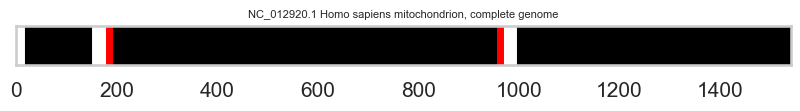

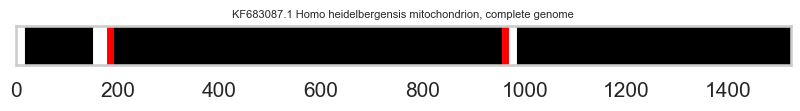

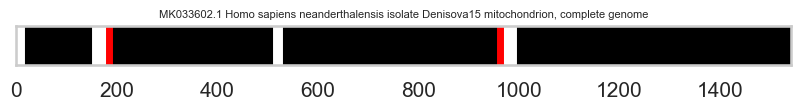

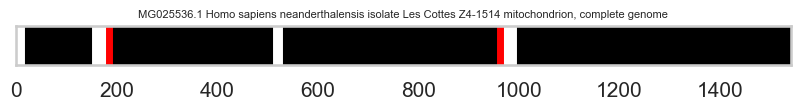

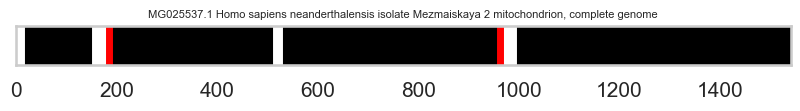

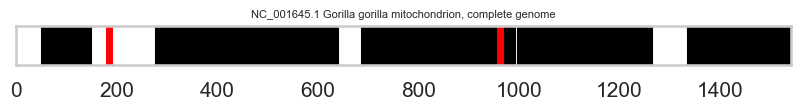

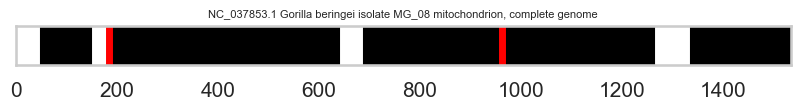

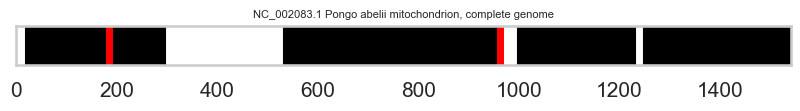

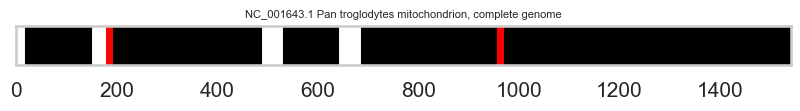

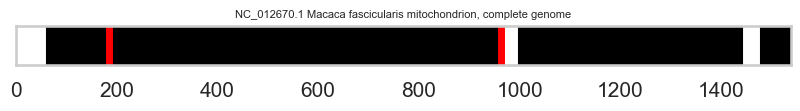

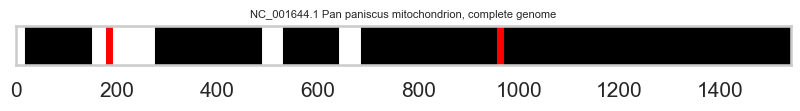

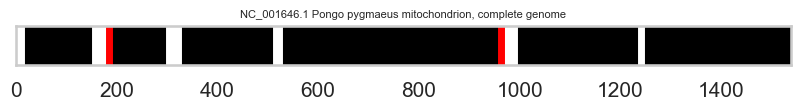

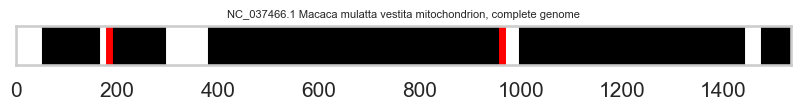

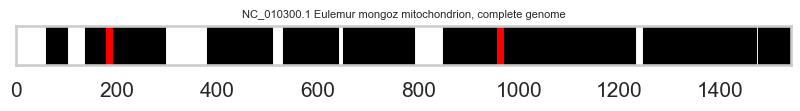

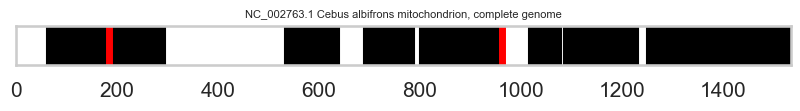

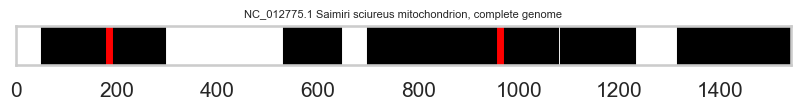

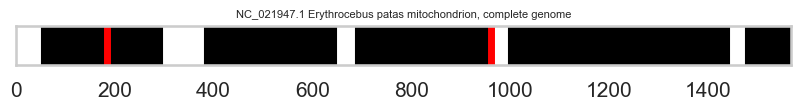

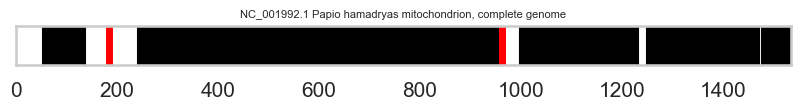

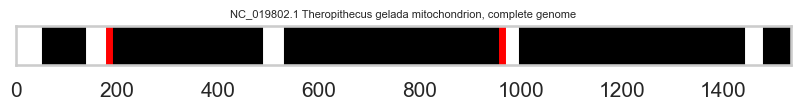

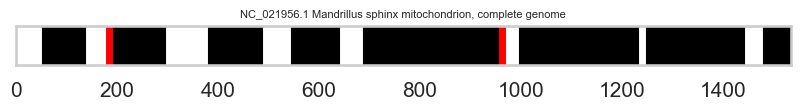

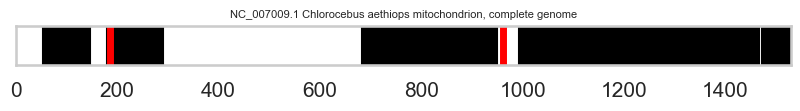

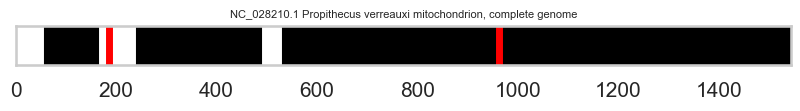

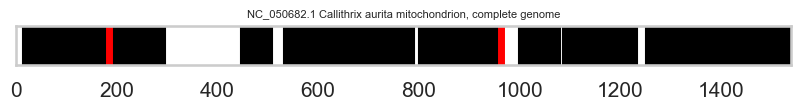

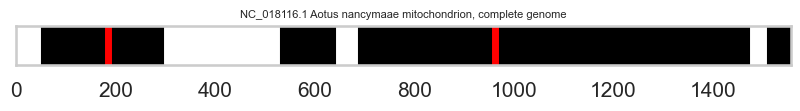

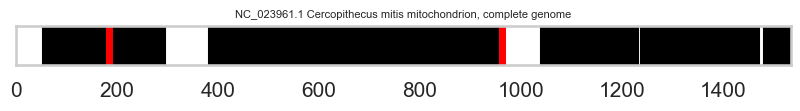

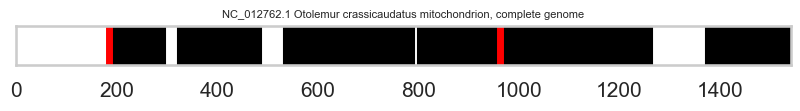

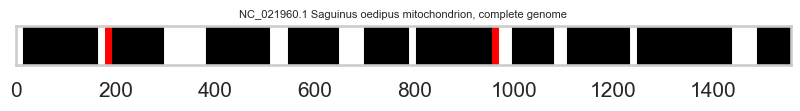

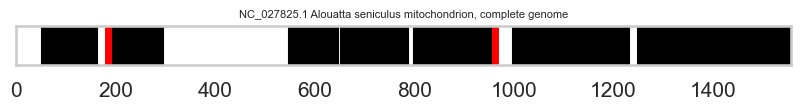

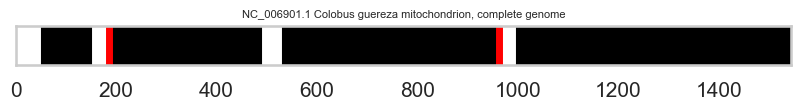

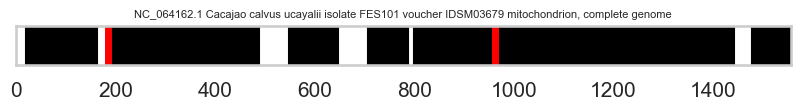

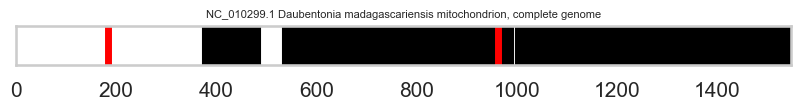

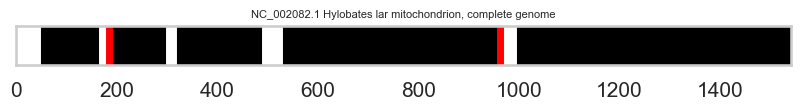

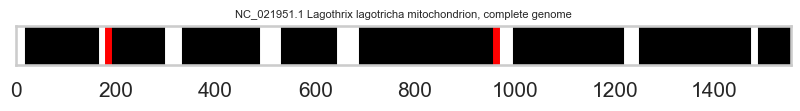

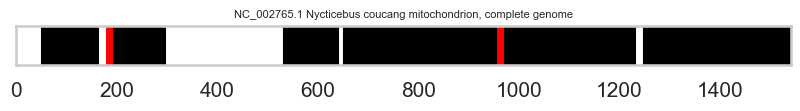

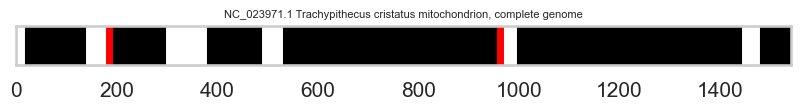

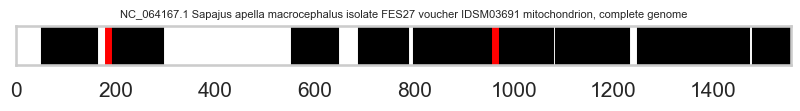

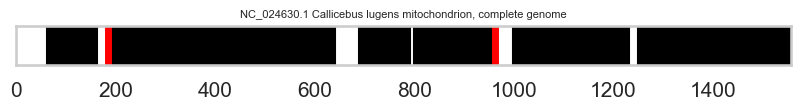

In [40]:

plot_protein_regions(mtco1_primates, 185, 962) # mtaltco1

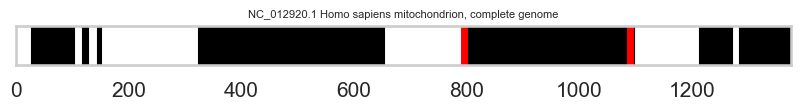

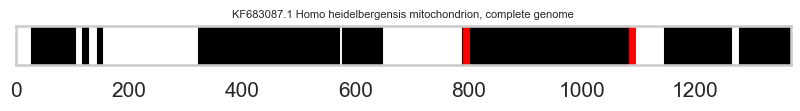

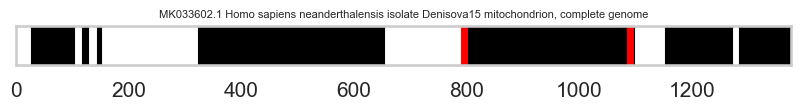

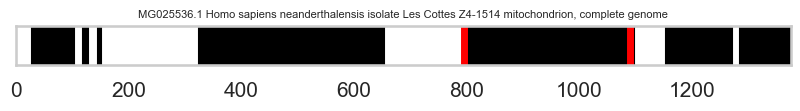

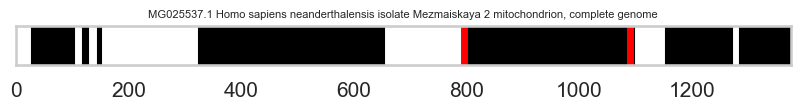

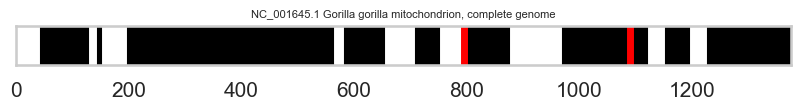

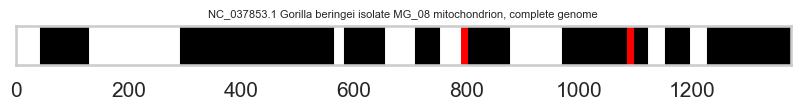

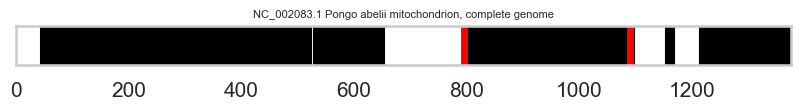

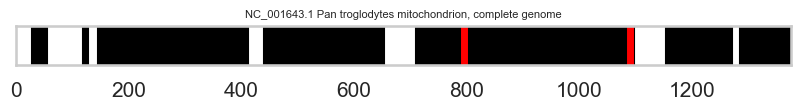

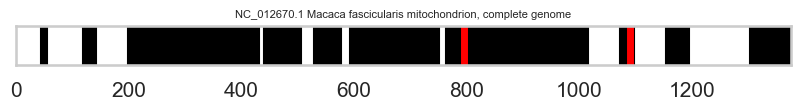

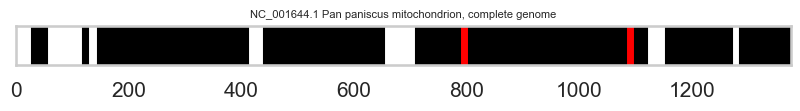

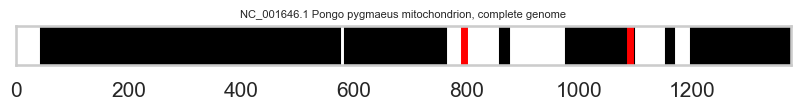

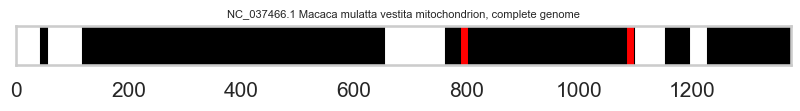

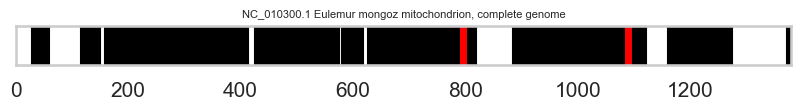

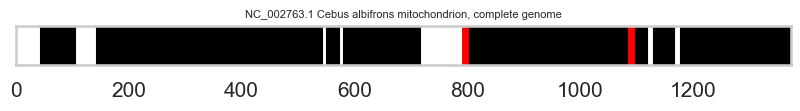

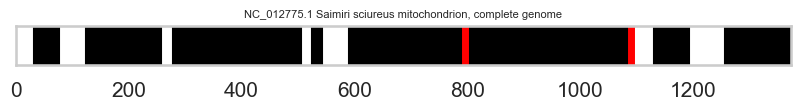

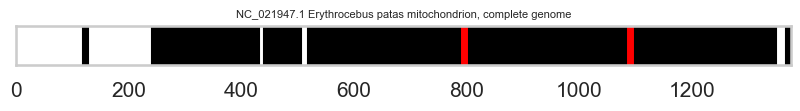

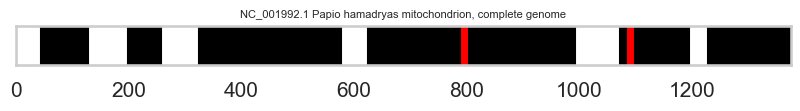

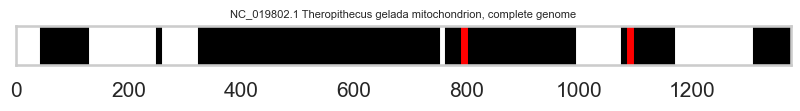

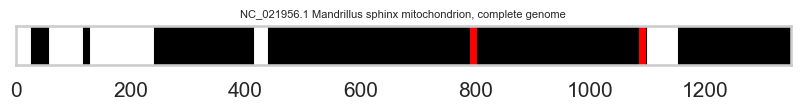

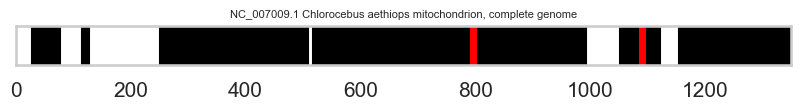

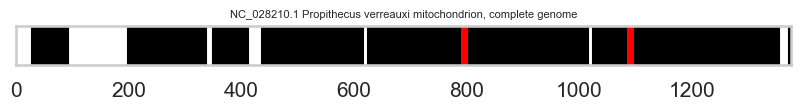

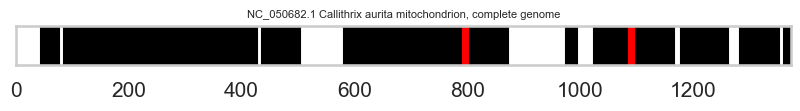

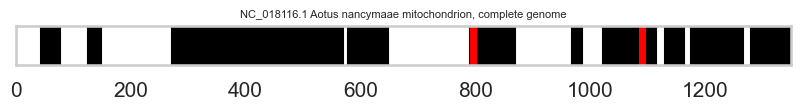

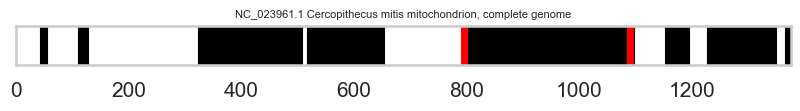

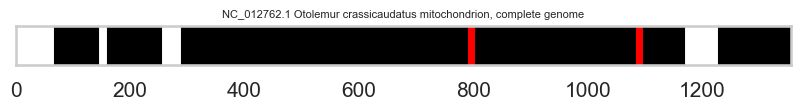

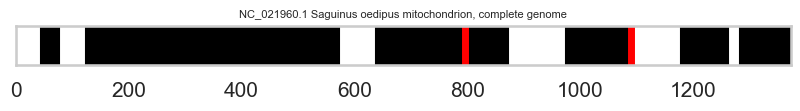

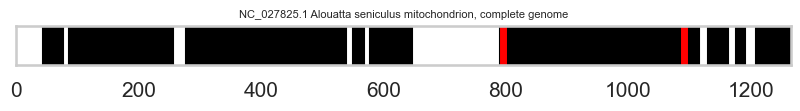

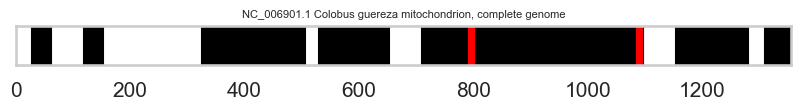

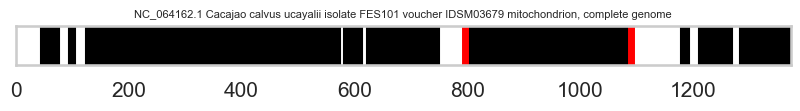

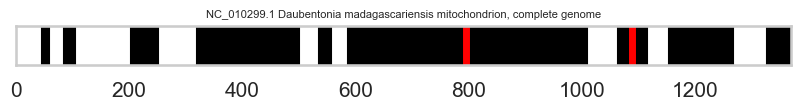

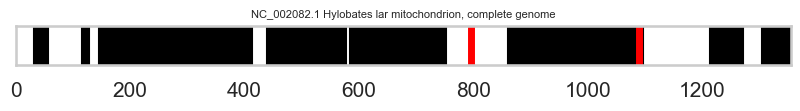

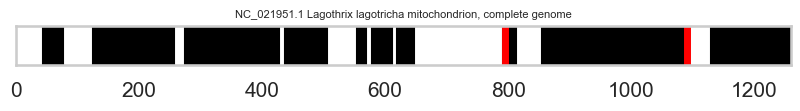

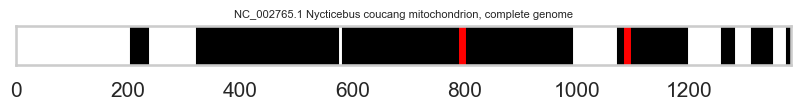

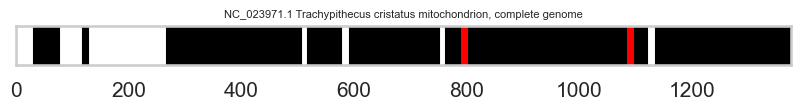

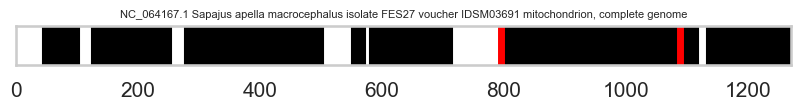

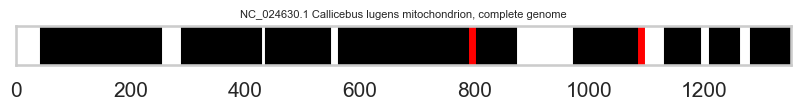

In [70]:

plot_protein_regions(mtnd4_primates, 795, 1090) # mtaltnd4

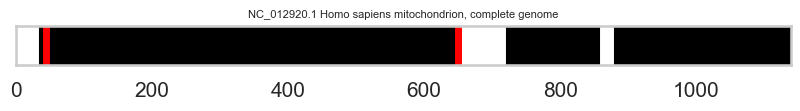

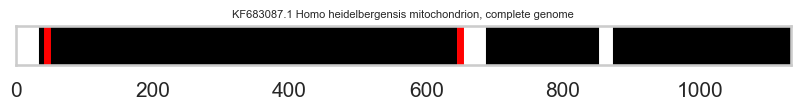

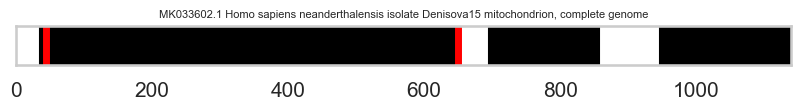

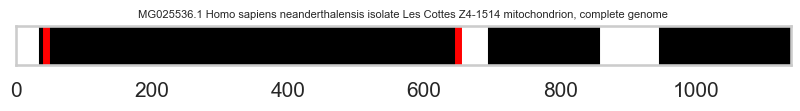

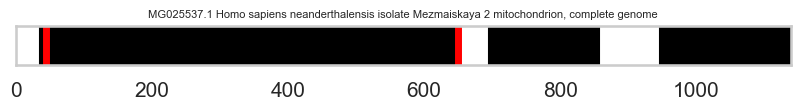

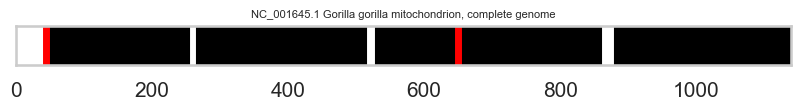

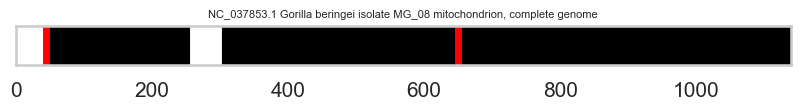

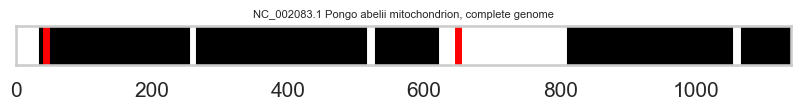

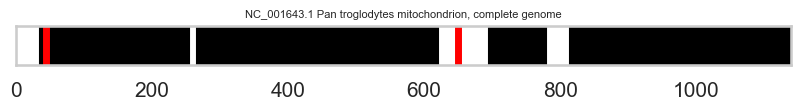

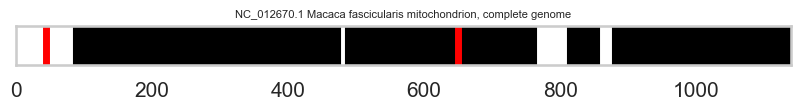

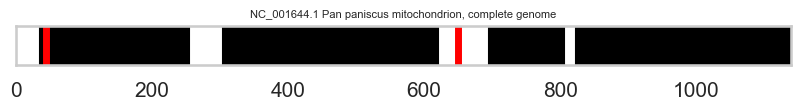

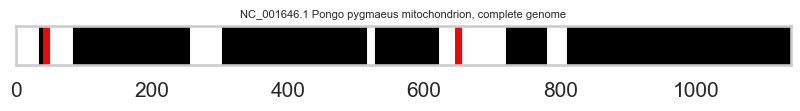

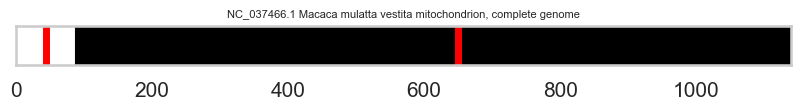

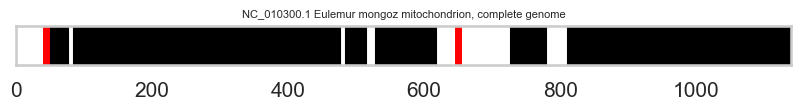

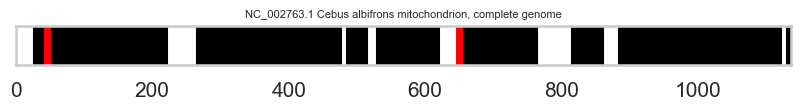

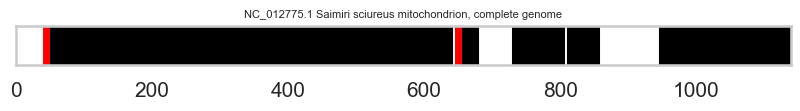

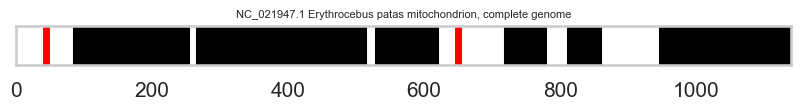

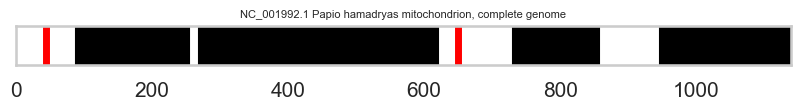

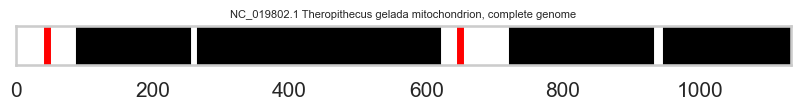

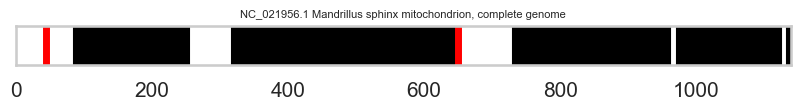

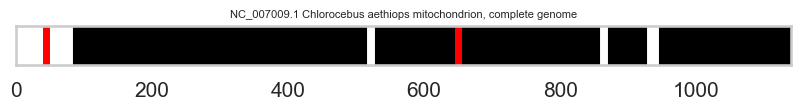

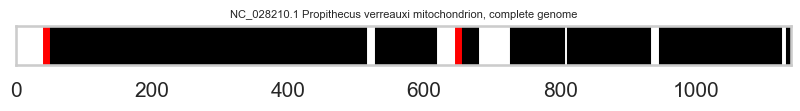

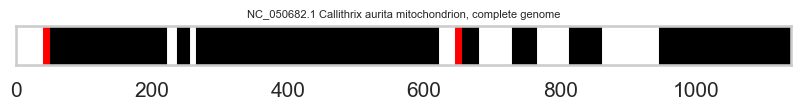

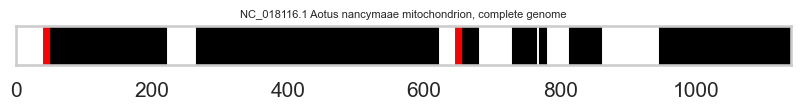

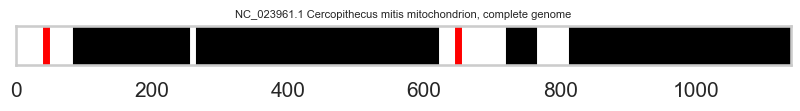

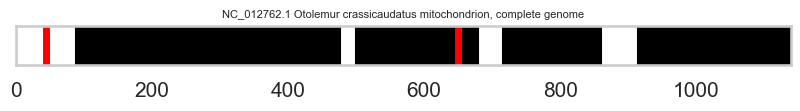

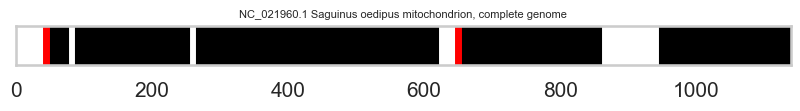

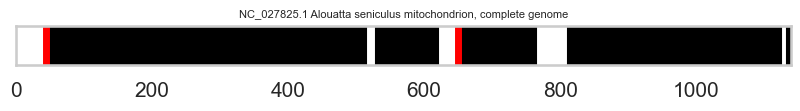

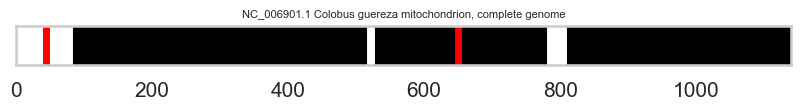

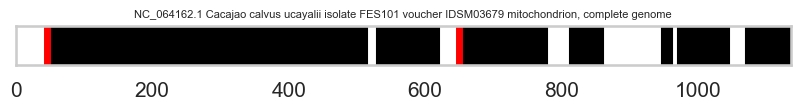

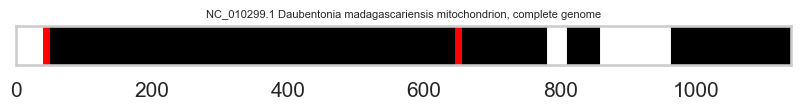

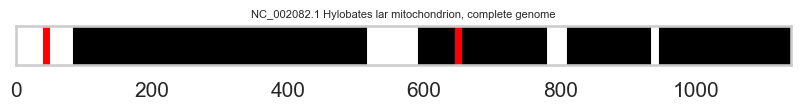

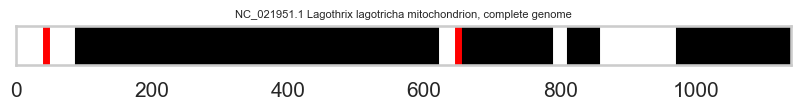

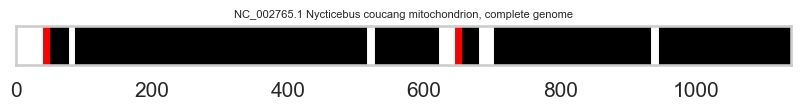

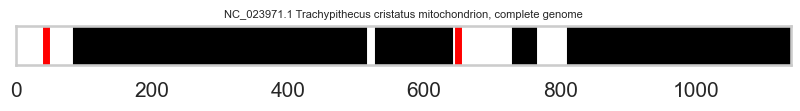

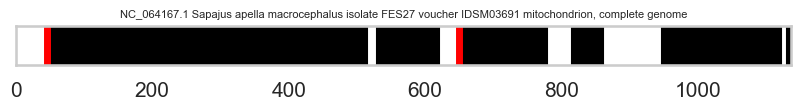

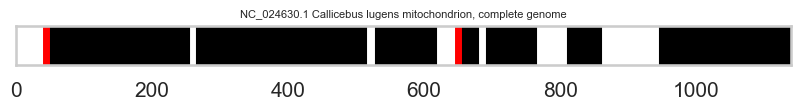

In [71]:

plot_protein_regions(mtcytb_primates, 45, 650) #mtaltcytb